In [75]:
#Librerias para el ejercicio 1
import os
from IPython.core.pylabtools import import_pylab
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report 
import zipfile
from tensorflow.python import keras
from keras.preprocessing import image
import sklearn.metrics as metrics
from keras.utils.np_utils import to_categorical
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from numpy import asarray
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import random
import numpy as np
import pandas as pd
from tensorflow.python import keras
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

from pandas_profiling import ProfileReport

import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier



In [6]:
#Librerias para el ejercicio 2
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Ejercicio 1

### Análisis exploratorio

In [76]:
train = pd.read_csv('./archivos/train.csv', encoding="ISO-8859-1")
test = pd.read_csv('./archivos/test.csv', encoding="ISO-8859-1")

In [8]:
print(train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [9]:
print(train.describe())

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0

In [10]:
print(train.dtypes)

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object


In [11]:
correlation_matrix = train.corr()
correlation_matrix

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.033424,0.025050,0.019558,0.014490,0.009790,0.006075,NaN,NaN,NaN,NaN
pixel0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel779,0.006075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000240,-0.000174,-0.000124,0.236633,0.905835,1.000000,NaN,NaN,NaN,NaN
pixel780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como se puede observar en el resumen, el conjunto de datos contiene un total de 785 columnas y 42000 filas. El propósito principal es que la columna denominada "label" representa el dígito dibujado por el usuario. En cuanto a las demás columnas, estas albergan los valores de cada píxel de la imagen relacionada. Cada imagen posee dimensiones de 28 píxeles de alto y 28 píxeles de ancho, totalizando así 784 píxeles en conjunto. Cada píxel está asociado a un único valor que refleja su nivel de luminosidad u oscuridad, donde valores más altos indican tonos más oscuros. Estos valores de píxeles son números enteros que oscilan entre 0 y 255, inclusive.

In [12]:
# Seleccionar la columna de interés
columna_interes = train['pixel350']

# Estadísticas descriptivas
print(columna_interes.describe())

count    42000.000000
mean        89.505786
std        108.979799
min          0.000000
25%          0.000000
50%          0.000000
75%        228.000000
max        255.000000
Name: pixel350, dtype: float64


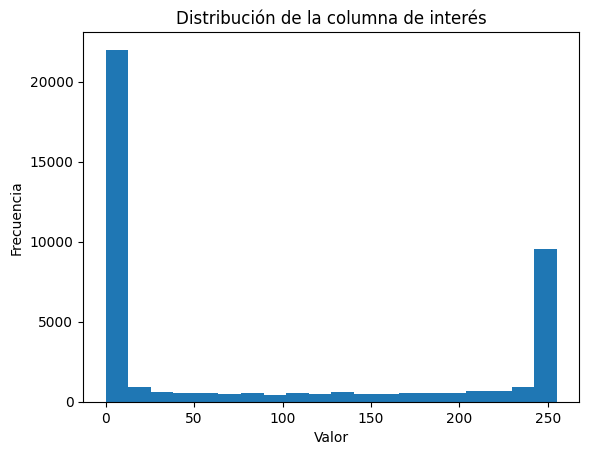

In [13]:
# Histograma
plt.hist(columna_interes, bins=20)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de la columna de interés')
plt.show()

In [14]:
# Prueba de normalidad (por ejemplo, Anderson-Darling)
from scipy.stats import anderson
result = anderson(columna_interes)
print('Estadístico de prueba:', result.statistic)
print('Niveles de significancia:', result.significance_level)

Estadístico de prueba: 5265.642287615556
Niveles de significancia: [15.  10.   5.   2.5  1. ]


Esto es un poco sobre el comportamiento del pixel para que se observe como funcionan los colores dentro de los pixeles. Se observan varios cambios de color dentro del histograma.

In [77]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32')
X_test = test.values.astype('float32')

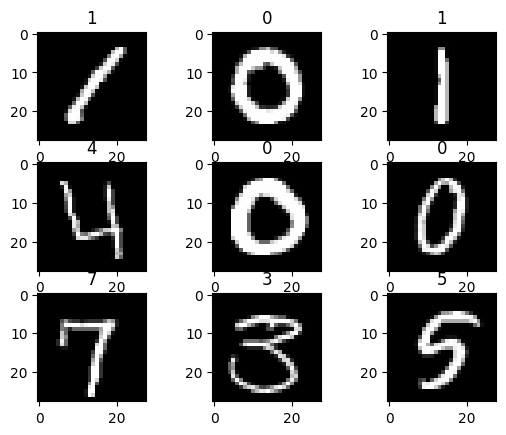

In [16]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

Se observan los pixeles ya convertidos en imagenes dentro de matrices.

In [17]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [18]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [19]:
#centrar los datos en torno a la media cero y la varianza unitaria.
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [20]:
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

### Modelo de Redes neuronales

In [21]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [22]:
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
gen = image.ImageDataGenerator()
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [24]:
history=model.fit(x=X_train,y=y_train,epochs=6,batch_size=16,validation_split=0.1,verbose=2)

Epoch 1/6
2127/2127 - 4s - loss: 0.4092 - accuracy: 0.8786 - val_loss: 0.3225 - val_accuracy: 0.9159 - 4s/epoch - 2ms/step
Epoch 2/6
2127/2127 - 4s - loss: 0.3179 - accuracy: 0.9118 - val_loss: 0.3123 - val_accuracy: 0.9238 - 4s/epoch - 2ms/step
Epoch 3/6
2127/2127 - 5s - loss: 0.3069 - accuracy: 0.9160 - val_loss: 0.3444 - val_accuracy: 0.9156 - 5s/epoch - 2ms/step
Epoch 4/6
2127/2127 - 4s - loss: 0.2969 - accuracy: 0.9192 - val_loss: 0.3217 - val_accuracy: 0.9214 - 4s/epoch - 2ms/step
Epoch 5/6
2127/2127 - 4s - loss: 0.2927 - accuracy: 0.9214 - val_loss: 0.3119 - val_accuracy: 0.9257 - 4s/epoch - 2ms/step
Epoch 6/6
2127/2127 - 4s - loss: 0.2899 - accuracy: 0.9225 - val_loss: 0.3333 - val_accuracy: 0.9220 - 4s/epoch - 2ms/step


Las pérdidas disminuyen y las precisiones aumentan tanto en el conjunto de entrenamiento como en el de validación, lo que sugiere que el modelo está aprendiendo adecuadamente y evitando problemas de sobreajuste.

In [25]:
ypred = model.predict(X_val,verbose=0)
y_prediction = []
for prediction in ypred:
  max_value = max(prediction)
  max_index = list(prediction).index(max_value)
  y_prediction.append(max_index)
y_prediction = np.array(y_prediction).astype('int64')
y_validation = []
for value in y_val:
  max_value = max(value)
  max_index = list(value).index(max_value)
  y_validation.append(max_index)
y_validation = np.array(y_validation).astype('int64')

In [26]:
accuracy = metrics.accuracy_score(y_validation, y_prediction)
accuracy

0.9045238095238095

In [27]:
result = confusion_matrix(y_validation, y_prediction)
result

array([[383,   0,   2,   1,   1,  10,   6,   0,   5,   0],
       [  0, 454,   3,   0,   0,   2,   1,   2,   8,   1],
       [  0,   3, 380,   3,   6,   3,   3,   5,  17,   0],
       [  1,   2,  11, 404,   0,  48,   3,   6,  25,   6],
       [  0,   0,   1,   1, 366,   1,   6,   2,   2,  18],
       [  2,   0,   3,   9,   2, 300,  11,   2,   8,   2],
       [  3,   0,   4,   0,   0,   7, 385,   0,   3,   0],
       [  1,   3,   9,   4,   7,   3,   1, 385,   3,  22],
       [  1,   6,   2,   5,   2,  17,   2,   0, 366,   2],
       [  1,   0,   2,   5,   8,   7,   0,   9,   8, 376]], dtype=int64)

Al analizar detenidamente el rendimiento de este modelo de predicción basado en una red neuronal, se revela que su precisión promedio alcanzó un valor destacado de 0.91. Esta cifra significativamente alta en términos de precisión es un indicio claro de que el modelo logró capturar de manera efectiva los patrones y relaciones subyacentes presentes en los datos. 

### Modelo de deep learning

In [28]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [29]:
x_train = X_train.reshape(-1, 28, 28,1)
x_test = X_test.reshape(-1, 28, 28,1)
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]

In [30]:
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)


In [31]:
modelo = Sequential()
#Agregamos la primera convolución
modelo.add(Convolution2D(20,(3,3), input_shape=(28,28,1), activation='relu'))

In [32]:
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Convolution2D(64,(3,3),strides=(1,1),activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Flatten())
modelo.add(Dense(256,activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [33]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        11584     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 1600)             0         
 pper)                                                           
                                                      

In [34]:
modelo.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [35]:
modelo.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [36]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [37]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [38]:
modelo.fit_generator(datagen.flow(x_train, y_train, batch_size=28), epochs=5)

Epoch 1/5


C:\Users\anaso\AppData\Local\Temp\ipykernel_29292\625653337.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  modelo.fit_generator(datagen.flow(x_train, y_train, batch_size=28), epochs=5)


1200/1200 [==============================] - 30s 24ms/step - loss: 0.5816 - accuracy: 0.8971
Epoch 2/5
1200/1200 [==============================] - 27s 22ms/step - loss: 0.3259 - accuracy: 0.9000
Epoch 3/5
1200/1200 [==============================] - 27s 23ms/step - loss: 0.3256 - accuracy: 0.9000
Epoch 4/5
1200/1200 [==============================] - 27s 22ms/step - loss: 0.3254 - accuracy: 0.9000
Epoch 5/5
1200/1200 [==============================] - 29s 24ms/step - loss: 0.3254 - accuracy: 0.9000


La pérdida disminuye a lo largo de las épocas, al igual que en el primer modelo. Sin embargo, es notable que la precisión se mantiene constante en 0.9000 durante todas las épocas. Cada época del entrenamiento toma aproximadamente 38-46 segundos, con un total de 5 épocas. El tiempo de entrenamiento es significativamente mayor en comparación con el primer modelo.

### Tercer modelo: KNN

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)

In [78]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
predict_train = knn.predict(X_train)

In [82]:
print(confusion_matrix(y_train, predict_train))

[[4112    1    2    0    1    4   11    0    0    1]
 [   0 4668    5    1    1    0    1    6    1    1]
 [  18   27 4068    4    1    1    2   51    3    2]
 [   1    8   19 4255    1   23    1   18   12   13]
 [   2   34    0    0 3980    0    7    1    0   48]
 [   8    1    2   29    3 3706   32    2    2   10]
 [  12    5    1    0    5   13 4101    0    0    0]
 [   1   42    9    0    6    0    0 4317    0   26]
 [   9   40    7   38   14   56   14    8 3852   25]
 [  11    4    3   22   33    8    2   36    4 4065]]


In [83]:
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4132
           1       0.97      1.00      0.98      4684
           2       0.99      0.97      0.98      4177
           3       0.98      0.98      0.98      4351
           4       0.98      0.98      0.98      4072
           5       0.97      0.98      0.97      3795
           6       0.98      0.99      0.99      4137
           7       0.97      0.98      0.98      4401
           8       0.99      0.95      0.97      4063
           9       0.97      0.97      0.97      4188

    accuracy                           0.98     42000
   macro avg       0.98      0.98      0.98     42000
weighted avg       0.98      0.98      0.98     42000



La precisión global (accuracy) es del 98%, lo que significa que el modelo clasificó correctamente el 98% de las instancias en el conjunto de prueba y que es el mejor modelo de predicción entre los otros dos modelos. 

# Ejercicio 2

In [39]:
importaciones = pd.read_excel('./archivos/importaciones.xlsx', sheet_name='IMPORTACION', index_col=None, skiprows=6, nrows=269, usecols='A:AB')
importaciones['Fecha'] = pd.to_datetime(importaciones['Fecha'])
importaciones['Año'] = pd.DatetimeIndex(importaciones['Fecha']).year
importaciones['Mes'] = pd.DatetimeIndex(importaciones['Fecha']).month
importaciones.set_index('Fecha', inplace=True)
importaciones = importaciones[['Mes', 'Año', 'Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
importaciones.rename(columns = {'Gasolina superior':'Super', 'Gasolina regular':'Regular', 'Diesel bajo azufre': 'Diesel', 'Gas licuado de petróleo':'Gas licuado'}, inplace = True)
importaciones

C:\Users\anaso\AppData\Local\Temp\ipykernel_29292\4082113593.py:1: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  importaciones = pd.read_excel('./archivos/importaciones.xlsx', sheet_name='IMPORTACION', index_col=None, skiprows=6, nrows=269, usecols='A:AB')


,Mes,Año,Super,Regular,Diesel,Gas licuado
Fecha,,,,,,
2001-01-01,1,2001,373963.96,177776.50,0.00,194065.738095
2001-02-01,2,2001,243091.07,123115.99,0.00,170703.380952
2001-03-01,3,2001,312084.38,161726.42,0.00,161837.371429
2001-04-01,4,2001,285054.89,127338.74,0.00,163048.642857
2001-05-01,5,2001,300913.67,168730.19,0.00,171518.861905
...,...,...,...,...,...,...
2023-01-01,1,2023,578792.14,909391.13,1442099.08,497780.690000
2023-02-01,2,2023,685183.06,725101.20,1267967.39,652984.710000
2023-03-01,3,2023,633849.05,803262.67,1317519.91,711978.350000


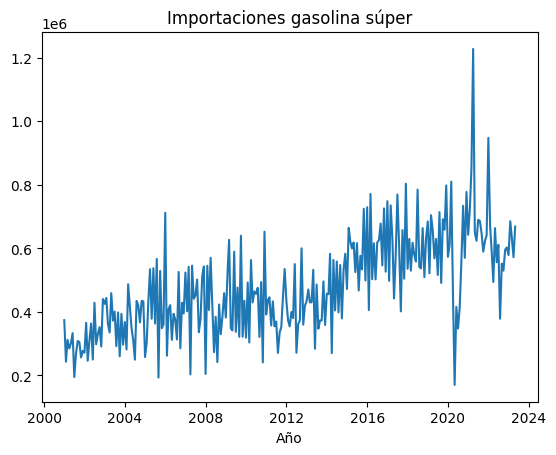

In [40]:
super = importaciones.Super
plt.plot(super)
plt.gca().set(title="Importaciones gasolina súper", xlabel="Año")
plt.show()

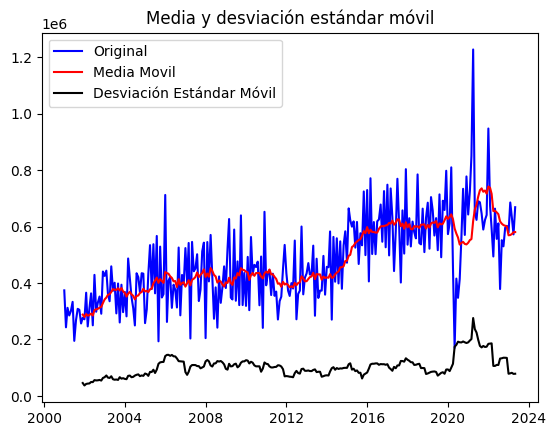

In [41]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovil = super.rolling(window=12).mean()
deMovil = super.rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot(super, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

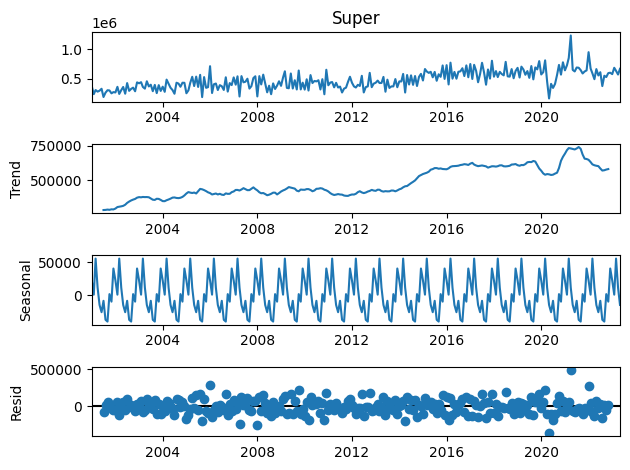

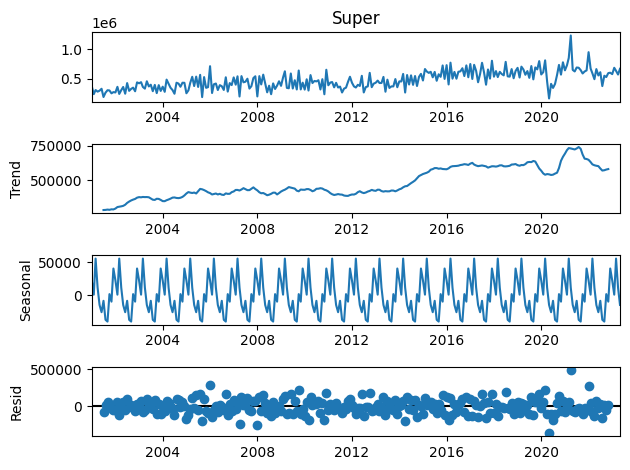

In [42]:
descomposicion = seasonal_decompose(super)
descomposicion.plot()

In [43]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(super, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -3.028435
p-value                        0.032323
# de retardos usados           3.000000
# de observaciones usadas    265.000000
Critical Value (1%)           -3.455270
Critical Value (5%)           -2.872509
Critical Value (10%)          -2.572615
dtype: float64


In [44]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
ts_super_diff = super.diff()
ts_super_diff.fillna(0,inplace=True)
dfTest = adfuller(ts_super_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba       -7.605893e+00
p-value                      2.322900e-11
# de retardos usados         1.100000e+01
# de observaciones usadas    2.570000e+02
Critical Value (1%)         -3.456054e+00
Critical Value (5%)         -2.872853e+00
Critical Value (10%)        -2.572799e+00
dtype: float64


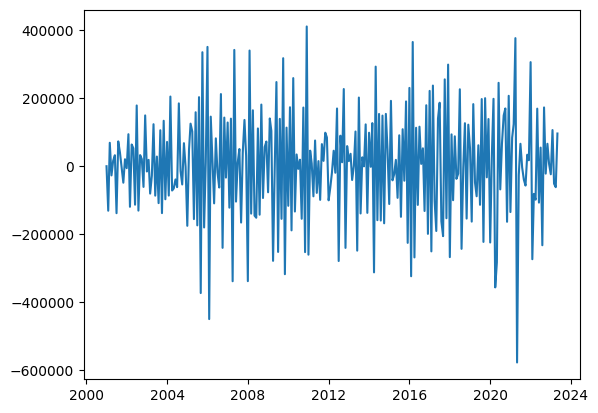

In [45]:
plt.plot(ts_super_diff)

Como las redes neuronales trabajan mejor con datos normalizados, procedemos a normalizar.

In [46]:
scaler = StandardScaler()
ts_super_diff=ts_super_diff.values.reshape(-1,1)
ts_super_scaled = scaler.fit_transform(ts_super_diff) 
ts_super_scaled[1:7]

array([[-0.81797429],
       [ 0.42085432],
       [-0.17432281],
       [ 0.09151111],
       [ 0.19344038],
       [-0.86305098]])

In [47]:
entrenamiento = round(0.6*len(ts_super_scaled))
val_prueba = round(0.2*len(ts_super_scaled))
test = ts_super_scaled[(entrenamiento+val_prueba)-1:]
validation = ts_super_scaled[(entrenamiento):entrenamiento+val_prueba+1]
train = ts_super_scaled[0:entrenamiento]
train=np.insert(train,0,0)
train=np.reshape(train,(train.shape[0],1))
len(test)

55

In [48]:
from operator import concat


def supervisada(serie,retrasos = 1):
    serie_x = []
    serie_y = []
    for i in range(len(serie)-retrasos):
        valor = serie[i:(i+retrasos),0]
        valor_sig = serie[i+retrasos,0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

x_train,y_train = supervisada(train)
x_val,y_val = supervisada(validation)
x_test,y_test = supervisada(test)

In [49]:
x_train = np.reshape(x_train,(x_train.shape[0],1,1))
x_val = np.reshape(x_val, (x_val.shape[0],1,1))
x_test = np.reshape(x_test, (x_test.shape[0],1,1))
len(x_val)

54

In [50]:
modelo1 = Sequential()
lote = 1
unidades =  1
paso = 1
caracteristicas = 1 #es univariada
modelo1.add(LSTM(lote, batch_input_shape=(lote,paso,caracteristicas),stateful=True))
modelo1.add(Dense(1))
modelo1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 1)                    12        
                                                                 
 dense_3 (Dense)             (1, 1)                    2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [51]:
modelo1.compile(loss='mean_squared_error',optimizer="rmsprop")

In [52]:
epocas = 50
history= modelo1.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/50
161/161 [==============================] - 3s 7ms/step - loss: 0.8923 - val_loss: 1.0972
Epoch 2/50
161/161 [==============================] - 0s 2ms/step - loss: 0.8580 - val_loss: 1.0512
Epoch 3/50
161/161 [==============================] - 0s 2ms/step - loss: 0.8238 - val_loss: 1.0047
Epoch 4/50
161/161 [==============================] - 0s 2ms/step - loss: 0.7909 - val_loss: 0.9593
Epoch 5/50
161/161 [==============================] - 0s 2ms/step - loss: 0.7599 - val_loss: 0.9161
Epoch 6/50
161/161 [==============================] - 0s 2ms/step - loss: 0.7311 - val_loss: 0.8755
Epoch 7/50
161/161 [==============================] - 0s 2ms/step - loss: 0.7046 - val_loss: 0.8378
Epoch 8/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6804 - val_loss: 0.8031
Epoch 9/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6586 - val_loss: 0.7713
Epoch 10/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6390 - val_loss: 0.7423

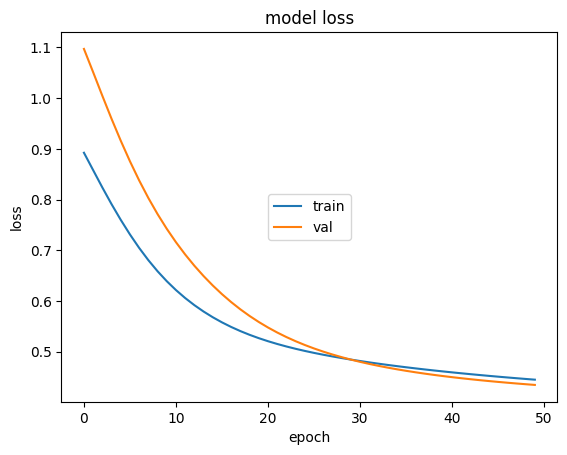

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

In [54]:
# Evaluación en los datos de entrenamiento
print("Pérdida en Entrenamiento")
modelo1.evaluate(
    x=x_train,
    y=y_train,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

# Evaluación en los datos de validación
print("Pérdida en Validación")
modelo1.evaluate(
    x=x_val,
    y=y_val,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

# Evaluación en los datos de prueba
print("Pérdida en Prueba")
modelo1.evaluate(
    x=x_test,
    y=y_test,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

Pérdida en Entrenamiento
  1/161 [..............................] - ETA: 6s - loss: 0.0678

161/161 [==============================] - 0s 2ms/step - loss: 0.4411
Pérdida en Validación
54/54 [==============================] - 0s 2ms/step - loss: 0.4343
Pérdida en Prueba
54/54 [==============================] - 0s 1ms/step - loss: 0.9329


0.9329131841659546

In [55]:
prediccion_val = []

def prediccion_fun(data,modelo, batch_size,scaler,dif=False,dif_cant=1, Series = np.NaN , n=1):
    prediccion = [0]* (len(data))
    i=0
    for X in data:
        X = np.reshape(X,(1,1,1))
        yhat = modelo1.predict(X, batch_size=batch_size,verbose=0)
        # invert scaling
        yhat = scaler.inverse_transform(yhat)
        if dif:
             # invert differencing
            yhat  = yhat + Series[(n+dif_cant*i)]
        # store
        prediccion[i]=yhat[0][0]
        i = i+1
    return prediccion
prediccion_val = prediccion_fun(x_val,modelo1, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento)
prediccion_test = prediccion_fun(x_test,modelo1, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento+val_prueba)


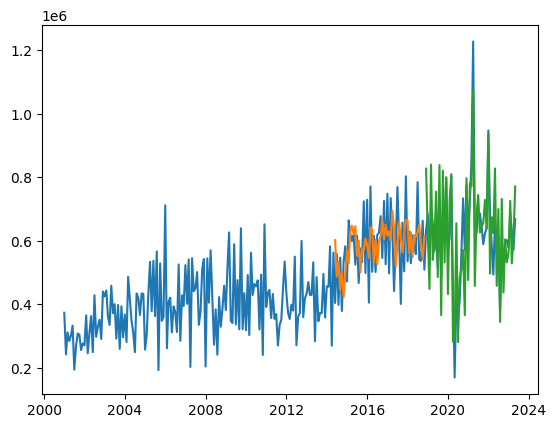

In [56]:
df_val = pd.DataFrame(prediccion_val,index=super[(entrenamiento):entrenamiento+val_prueba].index)
df_test = pd.DataFrame(prediccion_test,index=super[entrenamiento+len(df_val):len(super)].index)


plt.plot(super)
plt.plot(df_val)
plt.plot(df_test)


### Modelo 2

In [57]:
modelo2 = Sequential()
lote = 1
unidades =  3
paso = 1
caracteristicas = 1 #es univariada
modelo2.add(LSTM(lote, batch_input_shape=(lote,paso,caracteristicas),stateful=True))
modelo2.add(Dense(1))
modelo2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (1, 1)                    12        
                                                                 
 dense_4 (Dense)             (1, 1)                    2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [58]:
modelo2.compile(loss='mean_squared_error', optimizer="rmsprop")

In [59]:
epocas = 50
history= modelo2.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/50
161/161 [==============================] - 3s 7ms/step - loss: 0.9166 - val_loss: 1.1441
Epoch 2/50
161/161 [==============================] - 0s 3ms/step - loss: 0.9087 - val_loss: 1.1363
Epoch 3/50
161/161 [==============================] - 1s 3ms/step - loss: 0.9050 - val_loss: 1.1335
Epoch 4/50
161/161 [==============================] - 0s 3ms/step - loss: 0.9041 - val_loss: 1.1331
Epoch 5/50
161/161 [==============================] - 0s 2ms/step - loss: 0.9031 - val_loss: 1.1300
Epoch 6/50
161/161 [==============================] - 0s 3ms/step - loss: 0.8985 - val_loss: 1.1212
Epoch 7/50
161/161 [==============================] - 0s 2ms/step - loss: 0.8901 - val_loss: 1.1075
Epoch 8/50
161/161 [==============================] - 0s 2ms/step - loss: 0.8784 - val_loss: 1.0891
Epoch 9/50
161/161 [==============================] - 1s 4ms/step - loss: 0.8637 - val_loss: 1.0667
Epoch 10/50
161/161 [==============================] - 0s 2ms/step - loss: 0.8464 - val_loss: 1.0407

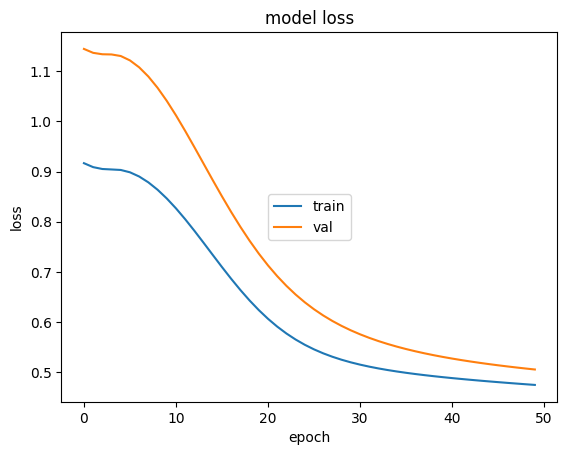

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

In [61]:
# Evaluación en los datos de entrenamiento
print("Pérdida en Entrenamiento")
modelo2.evaluate(
    x=x_train,
    y=y_train,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

# Evaluación en los datos de validación
print("Pérdida en Validación")
modelo2.evaluate(
    x=x_val,
    y=y_val,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

# Evaluación en los datos de prueba
print("Pérdida en Prueba")
modelo2.evaluate(
    x=x_test,
    y=y_test,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

Pérdida en Entrenamiento
161/161 [==============================] - 0s 2ms/step - loss: 0.4718
Pérdida en Validación
54/54 [==============================] - 0s 1ms/step - loss: 0.5059
Pérdida en Prueba
54/54 [==============================] - 0s 1ms/step - loss: 0.9751


0.9750964045524597

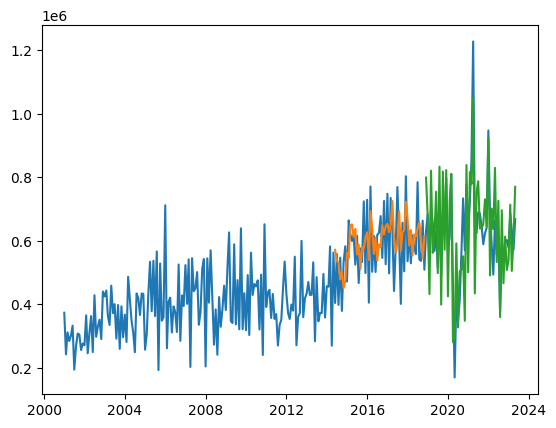

In [62]:
prediccion_val = []

def prediccion_fun(data,modelo, batch_size,scaler,dif=False,dif_cant=1, Series = np.NaN , n=1):
    prediccion = [0]* (len(data))
    i=0
    for X in data:
        X = np.reshape(X,(1,1,1))
        yhat = modelo2.predict(X, batch_size=batch_size,verbose=0)
        # invert scaling
        yhat = scaler.inverse_transform(yhat)
        if dif:
             # invert differencing
            yhat  = yhat + Series[(n+dif_cant*i)]
        # store
        prediccion[i]=yhat[0][0]
        i = i+1
    return prediccion
prediccion_val = prediccion_fun(x_val,modelo2, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento)
prediccion_test = prediccion_fun(x_test,modelo2, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento+val_prueba)

df_val = pd.DataFrame(prediccion_val,index=super[(entrenamiento):entrenamiento+val_prueba].index)
df_test = pd.DataFrame(prediccion_test,index=super[entrenamiento+len(df_val):len(super)].index)


plt.plot(super)
plt.plot(df_val)
plt.plot(df_test)

### Conclusión General

Concluimos que los modelos basados en LSTM son superiores en términos de capacidad predictiva en comparación con los modelos ARIMA. Esto se debe a que los modelos basados en LSTM son capaces de identificar patrones complejos en los datos. En este caso particular, estamos analizando el consumo de gasolina diésel, y según las gráficas previas, podemos decir que este comportamiento es intrincado debido a varios eventos significativos a lo largo de los años.  Se observo como el primer modelo tuvo un accuracy de 0.9329131841659546 y el segundo modelo un accuracy de 0.9750964045524597